# Lab 12/ Yahoo finense data set 08/08/2017 - 08/08/2019
Minakov Nikita, csse 1707DA

@minakov.nv

In [36]:
from __future__ import print_function, division

%matplotlib inline


import matplotlib as mpl

import numpy as np

import pandas as pd

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

from scipy import stats
import statistics 
import brfss
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from dateutil.parser import parse
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

import statsmodels.formula.api as smf

In [7]:
df = pd.read_csv('MSFT.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-07,72.800003,72.900002,72.260002,72.400002,69.410774,18705700
2017-08-08,72.089996,73.129997,71.750000,72.790001,69.784668,22044600
2017-08-09,72.250000,72.510002,72.050003,72.470001,69.477875,22213400
2017-08-10,71.900002,72.190002,71.349998,71.410004,68.461647,24734500
2017-08-11,71.610001,72.699997,71.279999,72.500000,69.506645,21443700


Function for plotting data:

In [11]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

'Data' against 'Open'

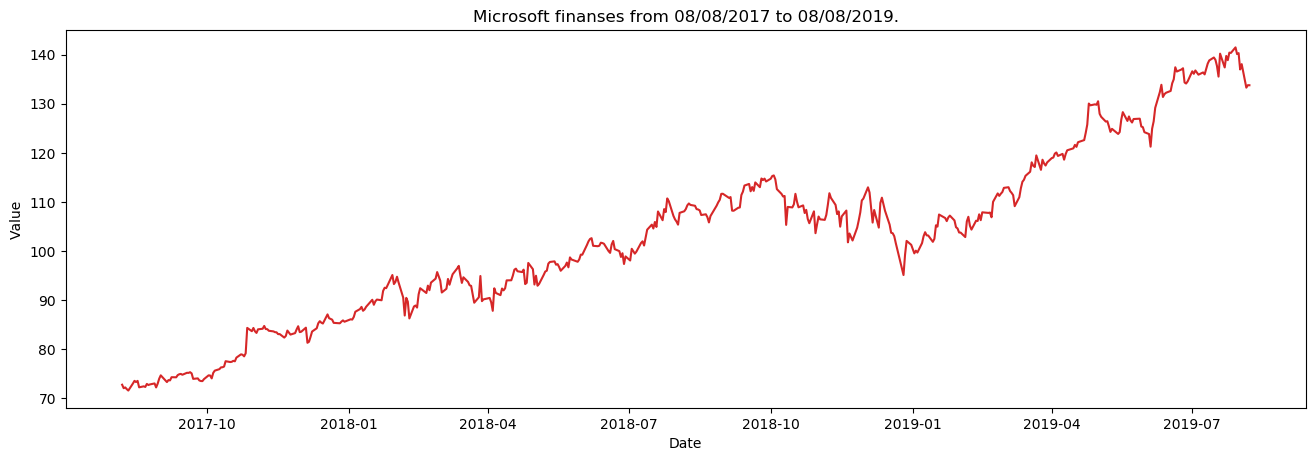

In [12]:
plot_df(df, x=df.index, y=df.Open, title='Microsoft finanses from 08/08/2017 to 08/08/2019.')    

'Data' against 'High' and 'Low'

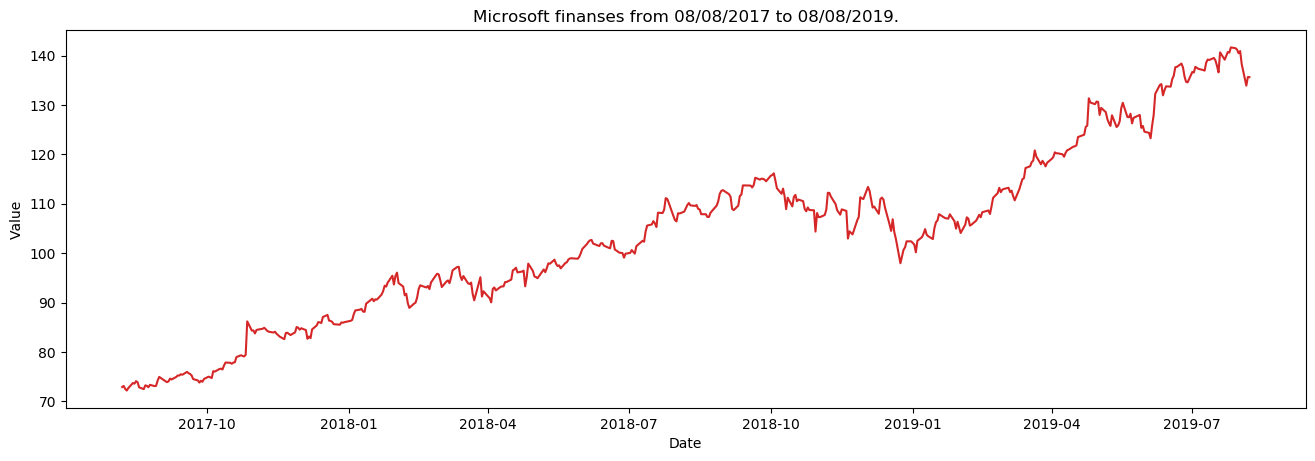

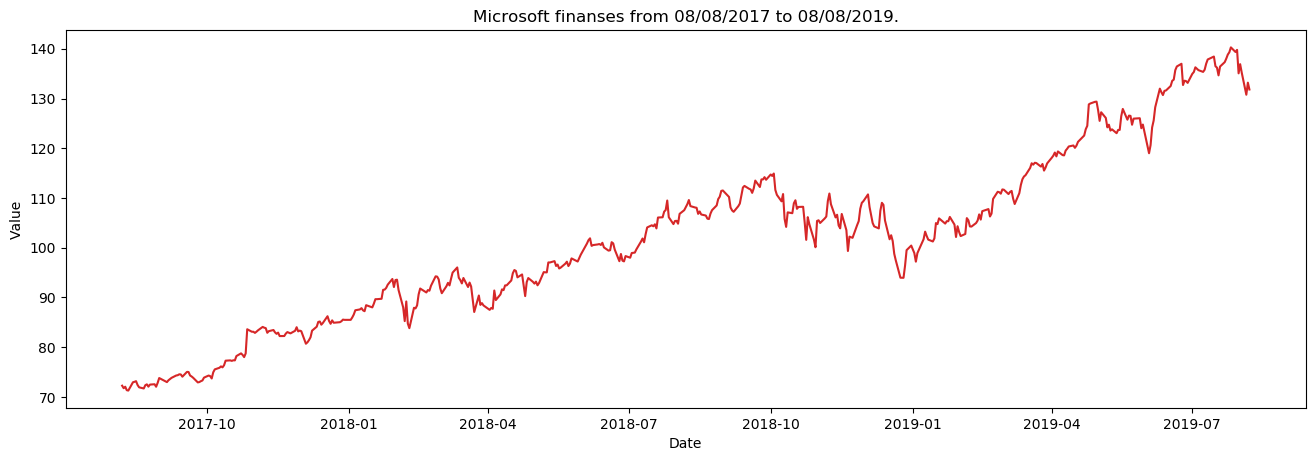

In [15]:
plot_df(df, x=df.index, y=df.High, title='Microsoft finanses from 08/08/2017 to 08/08/2019.')
plot_df(df, x=df.index, y=df.Low, title='Microsoft finanses from 08/08/2017 to 08/08/2019.')

Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

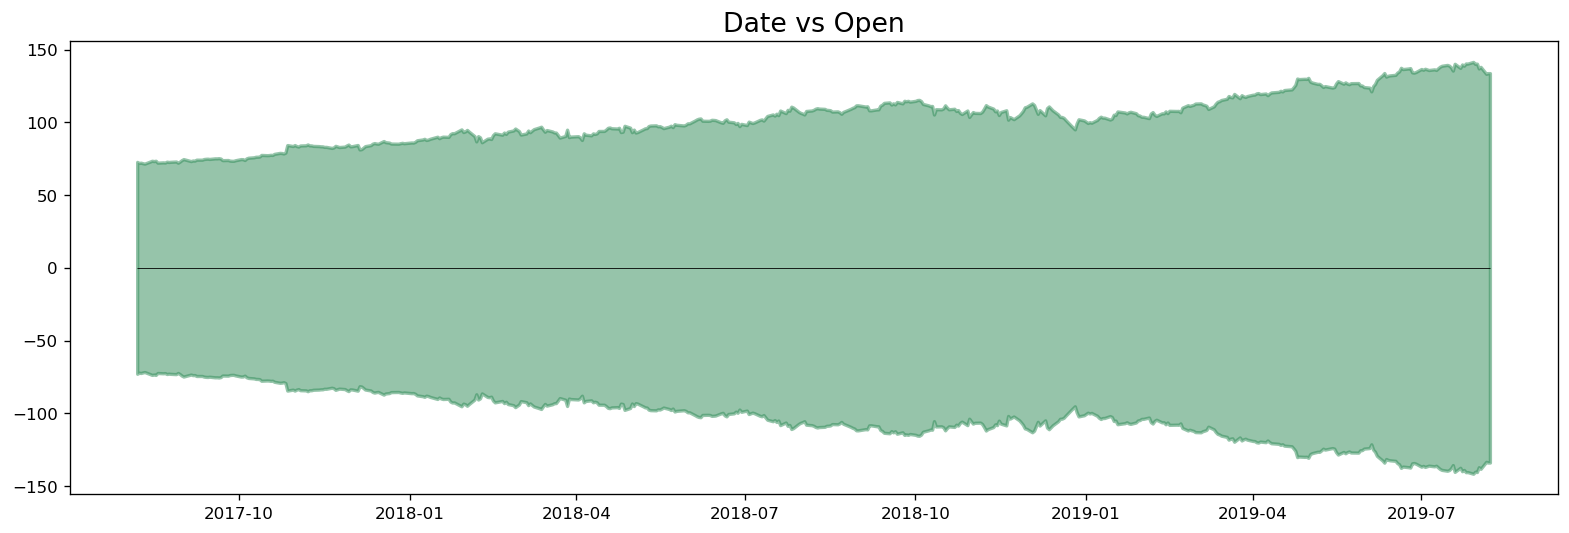

In [27]:
x = df.index.values
y1 = df['Open'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
#plt.ylim(-800, 800)
plt.title('Date vs Open', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

Since its a daily time series and follows a certain repetitive pattern every year, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.

You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

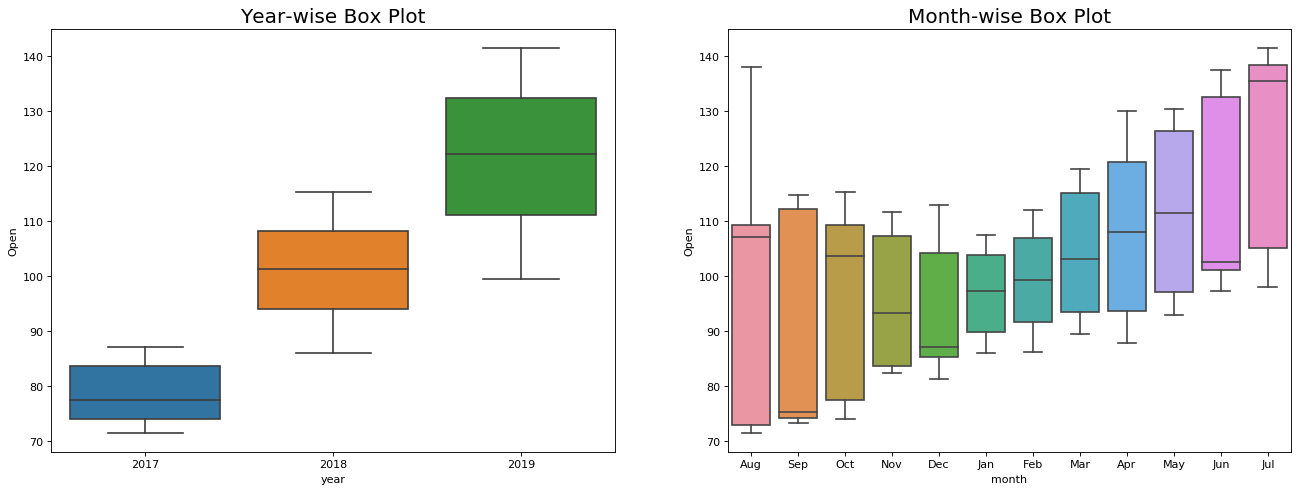

In [45]:
#df.reset_index(inplace=True)

# Prepare data
#df['year'] = [d.year for d in df.Date]
#df['month'] = [d.strftime('%b') for d in df.Date]
#years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Open', data=df, ax=axes[0])
sns.boxplot(x='month', y='Open', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot', fontsize=18); 
axes[1].set_title('Month-wise Box Plot', fontsize=18)
plt.show()

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly has lower sales.

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

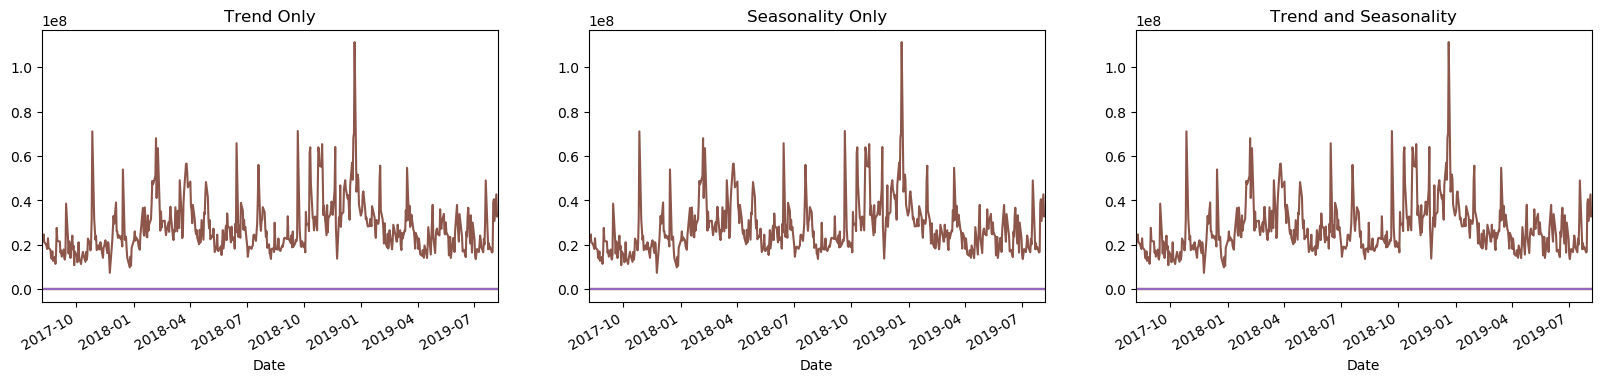

In [48]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('MSFT.csv', parse_dates=['Date'], index_col='Date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('MSFT.csv', parse_dates=['Date'], index_col='Date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('MSFT.csv', parse_dates=['Date'], index_col='Date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

## Date vs Open, high, low critical values

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller, kpss


result = adfuller(df.Open.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.Open.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.8002481848938208
p-value: 0.8190491543302953
Critial Values:
   1%, -3.4434437319767452
Critial Values:
   5%, -2.8673146875484368
Critial Values:
   10%, -2.569845688481135

KPSS Statistic: 2.462384
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\asus.VENIK\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.



In [63]:
result = adfuller(df.High.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.High.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.728092313273865
p-value: 0.8393382038552769
Critial Values:
   1%, -3.4434175660489905
Critial Values:
   5%, -2.8673031724657454
Critial Values:
   10%, -2.5698395516760275

KPSS Statistic: 2.471130
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\asus.VENIK\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [62]:
result = adfuller(df.Low.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.Low.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.5928130118659478
p-value: 0.8725977359912471
Critial Values:
   1%, -3.4436298692815304
Critial Values:
   5%, -2.867396599893435
Critial Values:
   10%, -2.5698893429241916

KPSS Statistic: 2.449713
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\asus.VENIK\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
Subtract the trend component obtained from time series decomposition we saw earlier.

Subtract the mean

Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Text(0.5, 1.0, 'Subtracting the least squares fit')

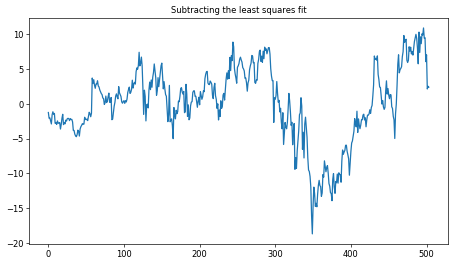

In [90]:
from scipy import signal

detrended = signal.detrend(df.Open.values)
plt.plot(detrended)
plt.title('Subtracting the least squares fit', fontsize=10)

The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

Hour of day


Day of month

Weekly

Monthly

Yearly
However, if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. More on the ACF in the upcoming sections. But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

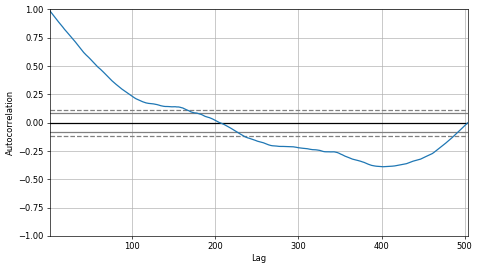

In [84]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':60})
autocorrelation_plot(df.Open.tolist())

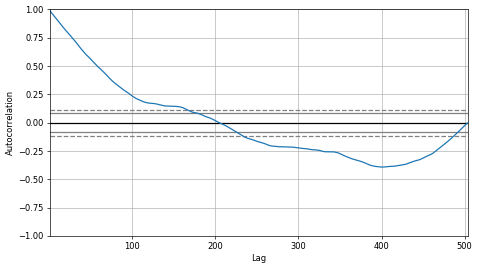

In [93]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':60})
autocorrelation_plot(df.High.tolist())

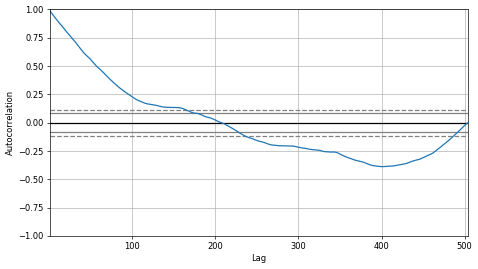

In [92]:
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':60})
autocorrelation_plot(df.Low.tolist())

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

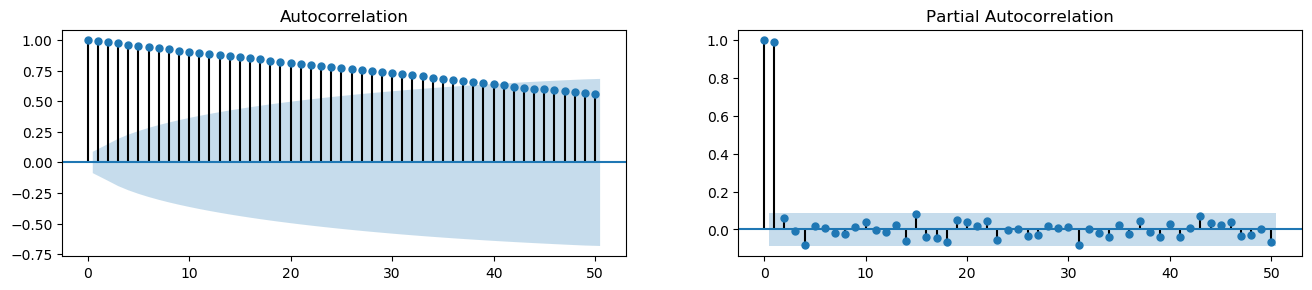

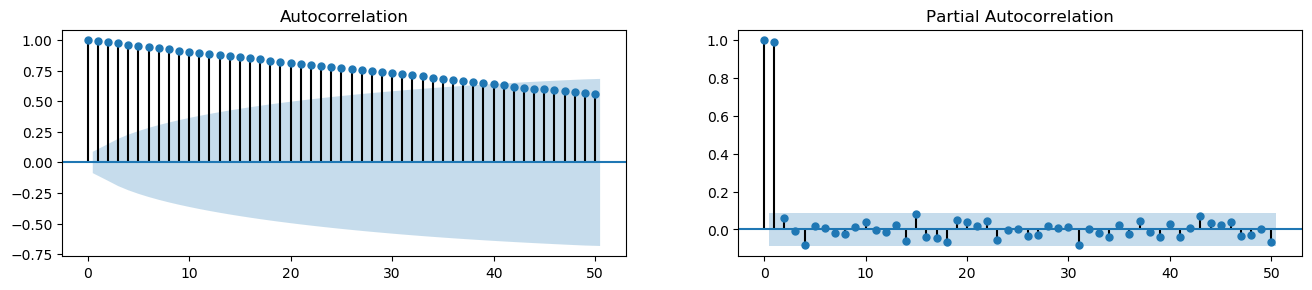

In [95]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.Open.tolist(), lags=50, ax=axes[0])
plot_pacf(df.Open.tolist(), lags=50, ax=axes[1])

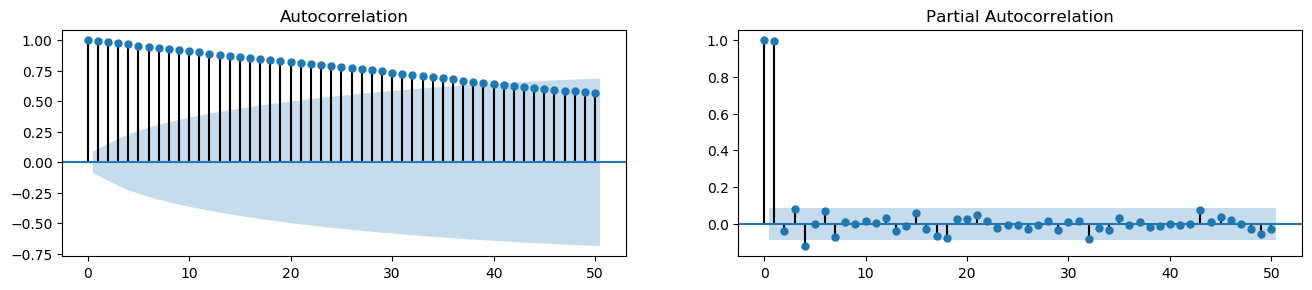

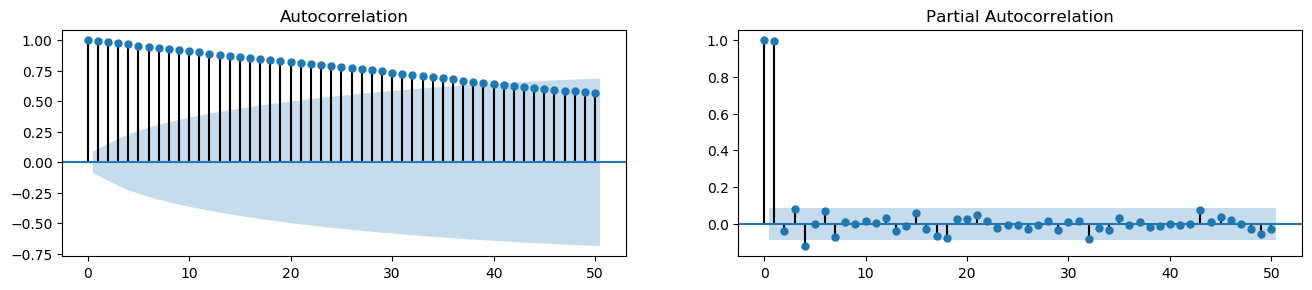

In [97]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.High.tolist(), lags=50, ax=axes[0])
plot_pacf(df.Low.tolist(), lags=50, ax=axes[1])

## Lag Plots
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In below example on Sunspots area time series, the plots get more and more scattered as the n_lag increases.

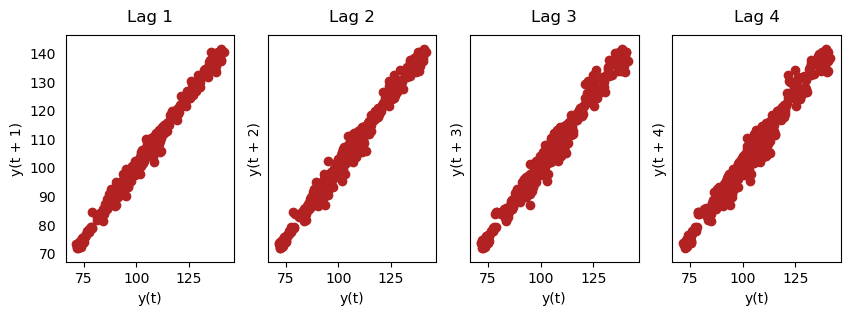

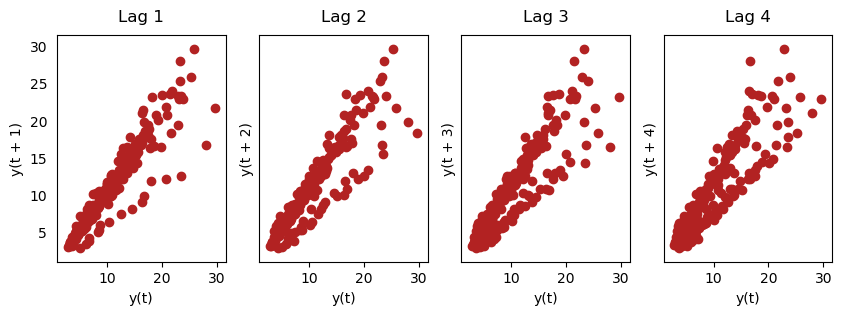

In [100]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.Open, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('', y=1.05)    
plt.show()


Smoothening of a time series may be useful in:

Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
The smoothed version of series can be used as a feature to explain the original series itself.
Visualize the underlying trend better
So how to smoothen a series? Let’s discuss the following methods:

Take a moving average
Do a LOESS smoothing (Localized Regression)
Do a LOWESS smoothing (Locally Weighted Regression)
Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

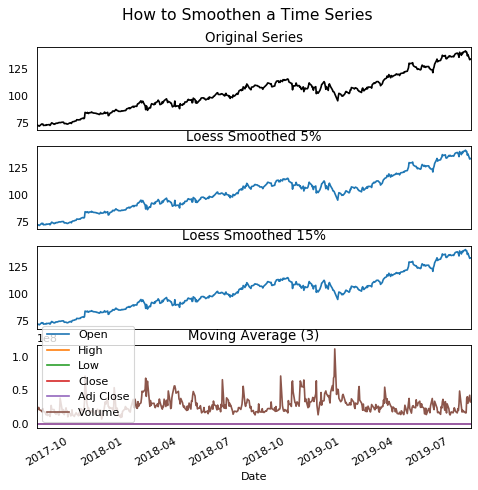

In [102]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import

# 1. Moving Average
df_ma = df.Open.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.Open, np.arange(len(df.Open)), frac=0.05)[:, 1], index=df.index, columns=['Open'])
df_loess_15 = pd.DataFrame(lowess(df.Open, np.arange(len(df.Open)), frac=0.15)[:, 1], index=df.index, columns=['Open'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=80)
df['Open'].plot(ax=axes[0], color='k', title='Original Series')
df['Open'].plot(ax=axes[1], title='Loess Smoothed 5%')
df['Open'].plot(ax=axes[2], title='Loess Smoothed 15%')
df.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()